In [130]:
import pandas as pd


In [131]:
#load the dataset
df = pd.read_csv("supply_chain_data.csv")
df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [132]:
df.shape

(100, 24)

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [134]:
df.describe()

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


In [135]:
df.isna().sum()

Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64

In [136]:
# Handle missing values
df.fillna(df.mean(), inplace=True)

# Convert data types
df['Price'] = df['Price'].astype(float)
df['Number of products sold'] = df['Number of products sold'].astype(int)

# Perform data transformations
df['Revenue generated'] = df['Price'] * df["Number of products sold"]

C:\Users\SUBHANKAR\AppData\Local\Temp\ipykernel_1764\619389433.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


# Product Sales

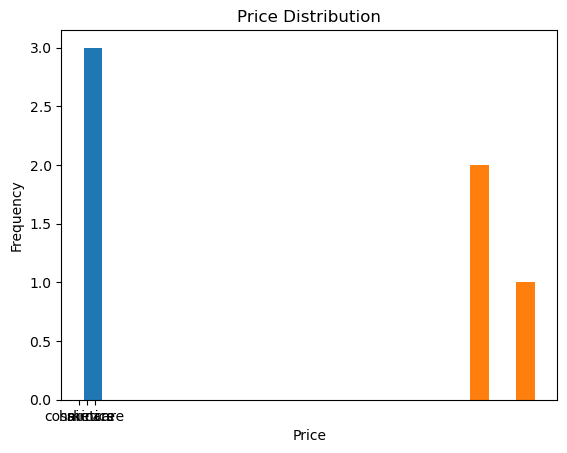

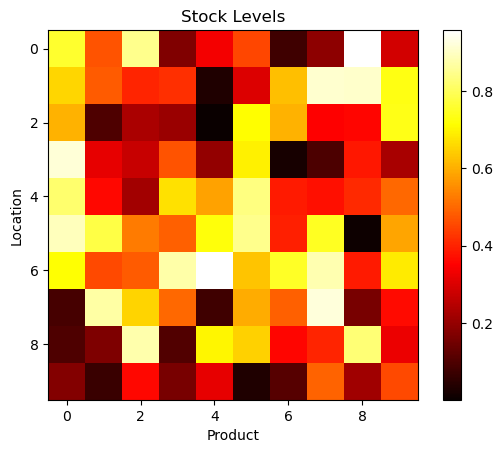

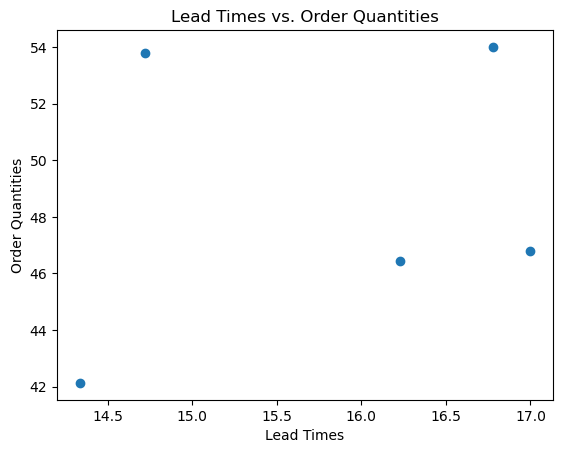

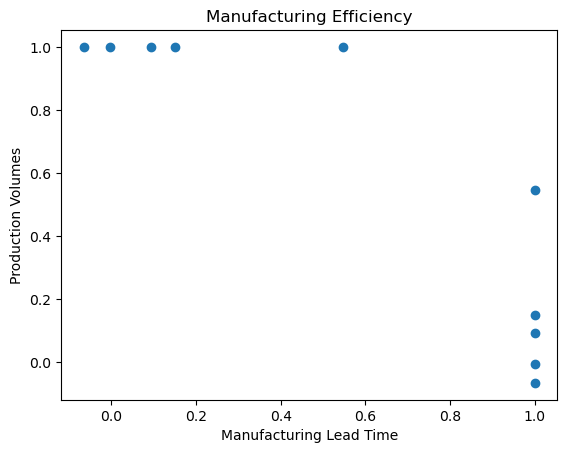

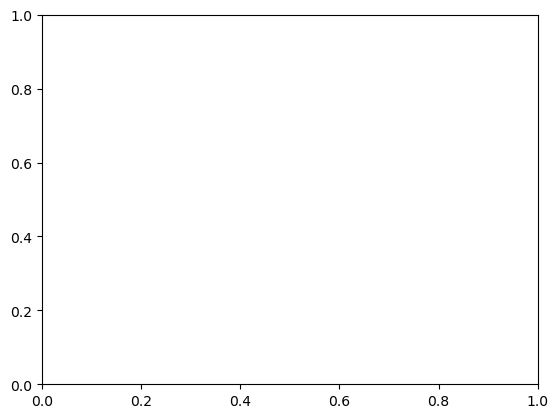

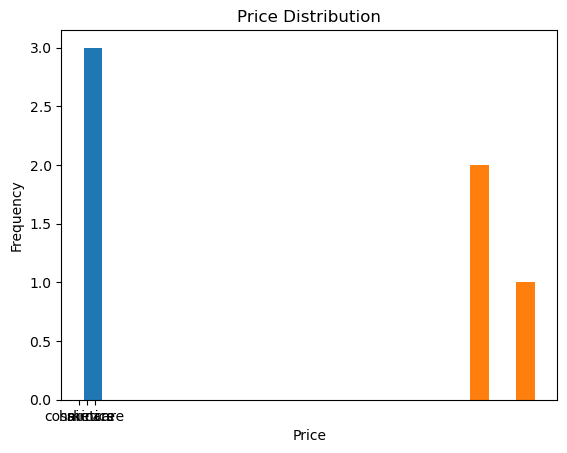

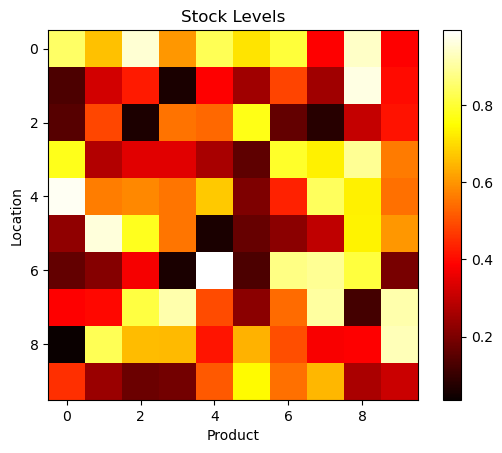

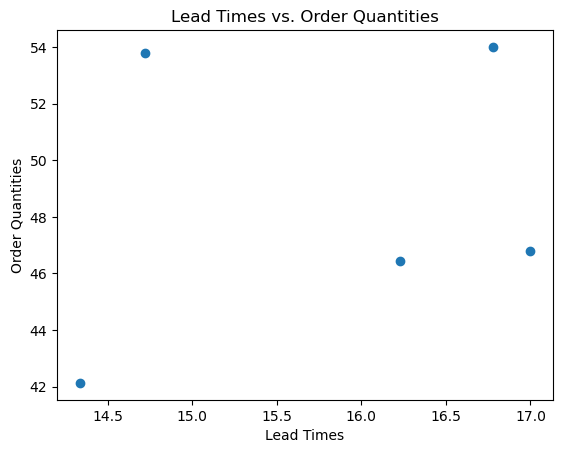

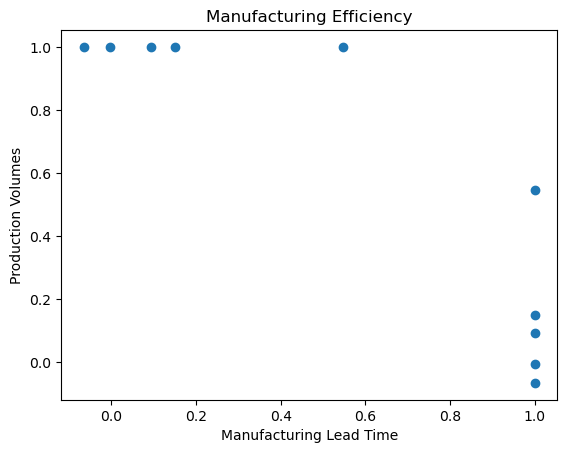

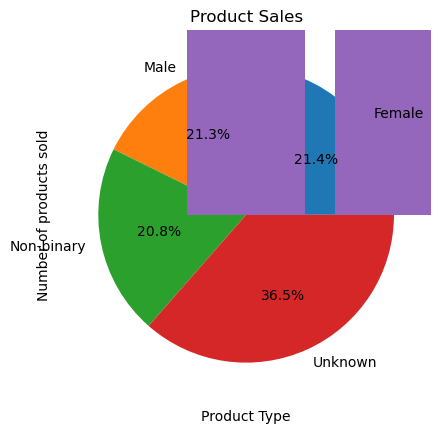

In [137]:
import matplotlib.pyplot as plt

# Group by Product Type and count the number of products sold
product_sales = df.groupby('Product type')['Number of products sold'].count()

# Create a bar chart
plt.bar(product_sales.index, product_sales.values)
plt.xlabel('Product Type')
plt.ylabel('Number of products sold')
plt.title('Product Sales')
plt.show()

# Revenue Analysis

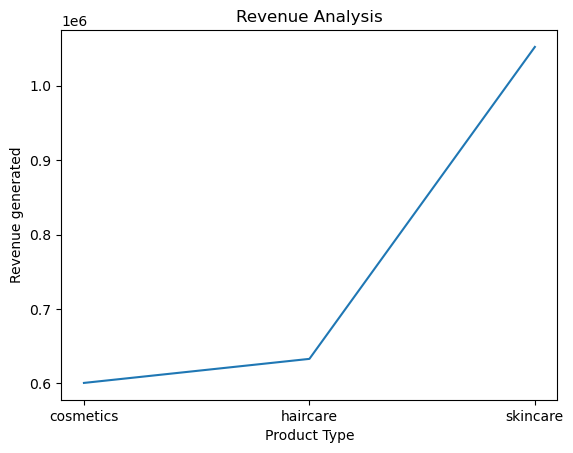

In [138]:
import matplotlib.pyplot as plt

# Group by Product Type and calculate the revenue generated
revenue_analysis = df.groupby(['Product type'])['Revenue generated'].sum()

# Create a line chart
plt.plot(revenue_analysis.index.get_level_values('Product type'), revenue_analysis.values)
plt.xlabel('Product Type')
plt.ylabel('Revenue generated')
plt.title('Revenue Analysis')
plt.show()

# Price Distribution

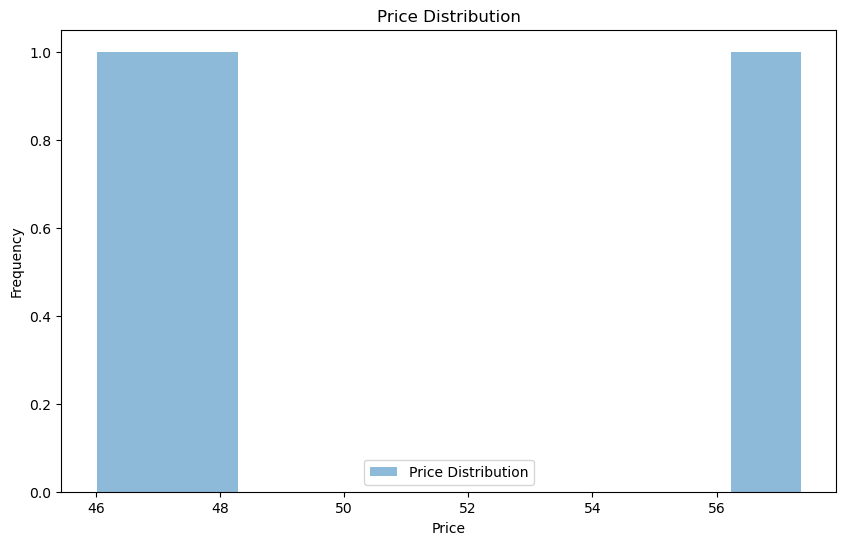

In [139]:
# Group the data by product type and calculate the mean price
price_distribution = df.groupby('Product type')['Price'].mean().reset_index()

# Create a histogram
plt.figure(figsize=(10,6))
plt.hist(price_distribution['Price'], bins=10, alpha=0.5, label='Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.legend()
plt.show()


# Stock Levels

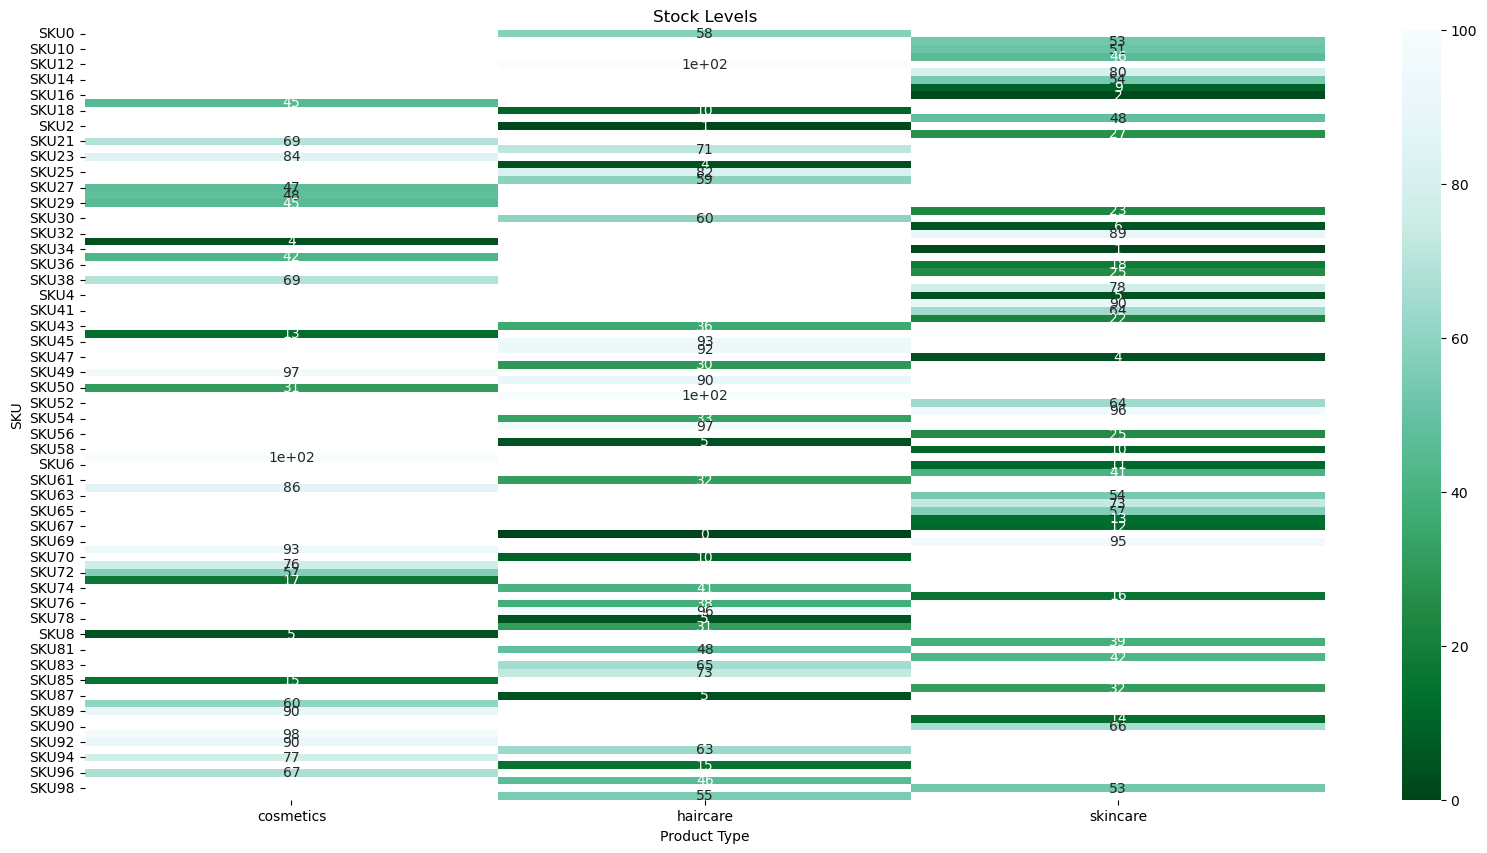

In [140]:
import seaborn as sns

# Group the data by SKU and product type, and calculate the mean stock level
stock_levels = df.groupby(['SKU', 'Product type'])['Stock levels'].mean().reset_index()

# Create a heatmap
plt.figure(figsize=(20,10))
sns.heatmap(stock_levels.pivot(index='SKU', columns='Product type', values='Stock levels'), annot=True, cmap='BuGn_r')
plt.xlabel('Product Type')
plt.ylabel('SKU')
plt.title('Stock Levels')
plt.show()

# Lead Times vs. Order Quantities

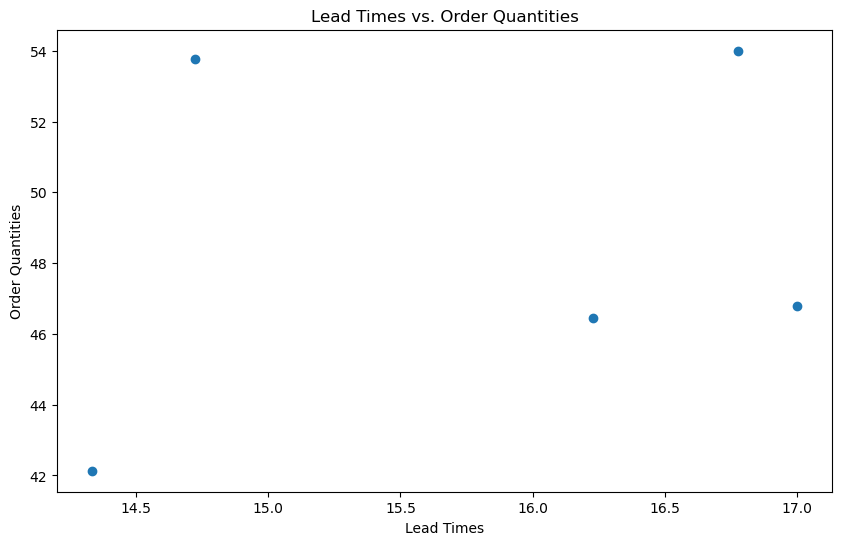

In [141]:
# Group the data by supplier name and calculate the mean lead time and order quantity
lead_times_order_quantities = df.groupby('Supplier name')[['Lead times', 'Order quantities']].mean().reset_index()

# Create a scatter plot
plt.figure(figsize=(10,6))
plt.scatter(lead_times_order_quantities['Lead times'], lead_times_order_quantities['Order quantities'])
plt.xlabel('Lead Times')
plt.ylabel('Order Quantities')
plt.title('Lead Times vs. Order Quantities')
plt.show()

# Shipping Costs by Carrier

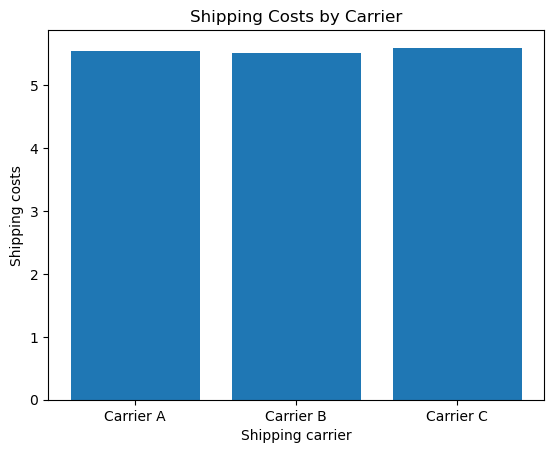

In [142]:
import matplotlib.pyplot as plt

# Group by Shipping carrier and calculate the shipping costs
shipping_costs = df.groupby('Shipping carriers')['Shipping costs'].mean()

# Create a bar chart
plt.bar(shipping_costs.index, shipping_costs.values)
plt.xlabel('Shipping carrier')
plt.ylabel('Shipping costs')
plt.title('Shipping Costs by Carrier')
plt.show()

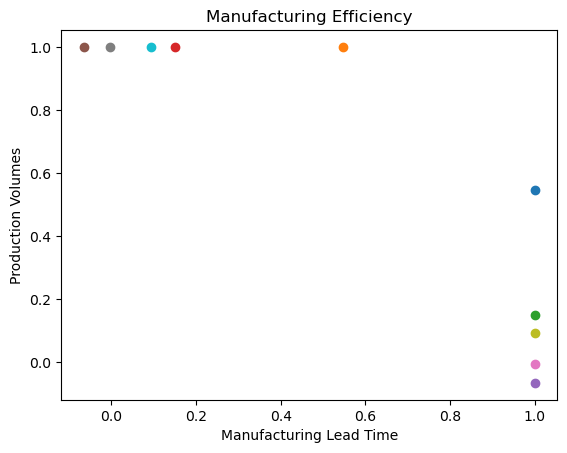

In [143]:
import matplotlib.pyplot as plt

# Group by Supplier name and calculate the correlation between Manufacturing lead time and Production volumes
manufacturing_efficiency = df.groupby('Supplier name')[['Manufacturing lead time', 'Production volumes']].corr()

# Create a scatter plot
for supplier in manufacturing_efficiency.index:
    plt.scatter(manufacturing_efficiency.loc[supplier, 'Manufacturing lead time'], manufacturing_efficiency.loc[supplier, 'Production volumes'])
plt.xlabel('Manufacturing Lead Time')
plt.ylabel('Production Volumes')
plt.title('Manufacturing Efficiency')
plt.show()

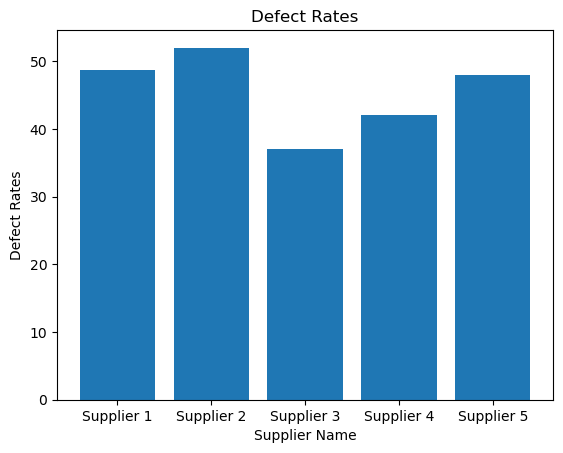

In [144]:
# Defect Rates
defect_rates = df.groupby('Supplier name')['Defect rates'].sum()
plt.bar(defect_rates.index, defect_rates.values)
plt.xlabel('Supplier Name')
plt.ylabel('Defect Rates')
plt.title('Defect Rates')
plt.show()


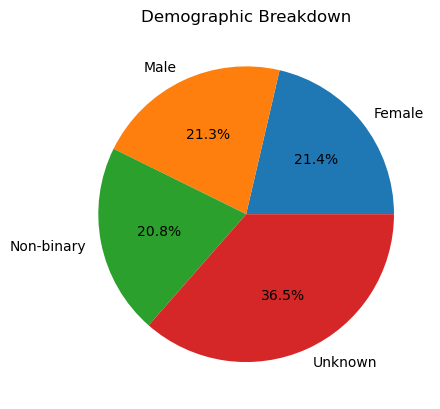

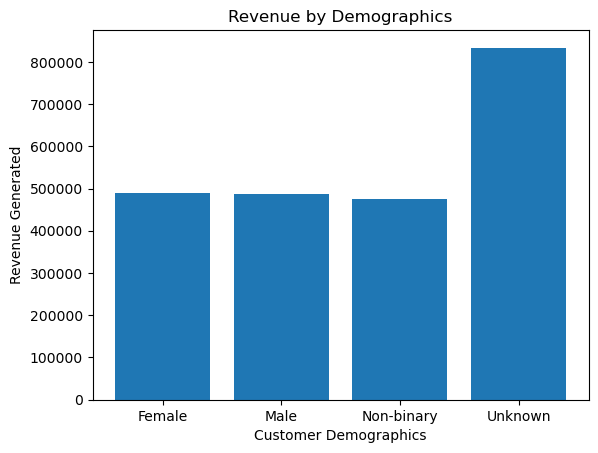

In [145]:
# Demographic Breakdown
demographic_breakdown = df.groupby('Customer demographics')['Revenue generated'].sum()
plt.pie(demographic_breakdown.values, labels=demographic_breakdown.index, autopct='%1.1f%%')
plt.title('Demographic Breakdown')
plt.show()

# Revenue by Demographics
revenue_demographics = df.groupby('Customer demographics')['Revenue generated'].sum()
plt.bar(revenue_demographics.index, revenue_demographics.values)
plt.xlabel('Customer Demographics')
plt.ylabel('Revenue Generated')
plt.title('Revenue by Demographics')
plt.show()

In [146]:
# Which Product Type generates the highest revenue?
highest_revenue_product = df.groupby('Product type')['Revenue generated'].sum().idxmax()
print(f"The product type that generates the highest revenue is {highest_revenue_product}.")

# Are there any significant correlations between Lead times and Order quantities?
lead_times_order_quantities_corr = df[['Lead times', 'Order quantities']].corr()
print(f"The correlation between Lead times and Order quantities is {lead_times_order_quantities_corr.iloc[0, 1]:.2f}.")

# How do Shipping costs vary by Shipping carrier and Location ?
shipping_costs_carrier_location = df.groupby(['Shipping carriers', 'Location'])['Shipping costs'].sum()
print(shipping_costs_carrier_location)

# Which supplier has the most efficient manufacturing process based on Manufacturing lead time and Production volumes?
manufacturing_efficiency_supplier = df.groupby('Supplier name')[['Manufacturing lead time', 'Production volumes']].corr()
print(manufacturing_efficiency_supplier)

# What demographic group contributes the most to sales?
demographic_sales = df.groupby('Customer demographics')['Revenue generated'].sum()
print(demographic_sales.idxmax())

The product type that generates the highest revenue is skincare.
The correlation between Lead times and Order quantities is 0.11.
Shipping carriers  Location 
Carrier A          Bangalore    39.660560
                   Chennai      36.764523
                   Delhi        25.328867
                   Kolkata      27.653025
                   Mumbai       26.130855
Carrier B          Bangalore    46.543916
                   Chennai      28.010681
                   Delhi        30.762734
                   Kolkata      66.088898
                   Mumbai       65.491391
Carrier C          Bangalore    17.267540
                   Chennai      29.006373
                   Delhi        19.956614
                   Kolkata      50.293423
                   Mumbai       45.855507
Name: Shipping costs, dtype: float64
                                       Manufacturing lead time  \
Supplier name                                                    
Supplier 1    Manufacturing lead time     

In [147]:
import streamlit as st
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assume that stock_levels is a pandas DataFrame
stock_levels = pd.DataFrame(np.random.rand(10, 10))  # Replace with your actual data

st.title("Supply Chain Management Dashboard")

st.header("Product Performance")

st.subheader("Product Sales")
st.bar_chart(product_sales)

st.subheader("Revenue Analysis")
st.line_chart(revenue_analysis)

st.subheader("Price Distribution")
fig, ax = plt.subplots()
ax.hist(price_distribution)
ax.set_title('Price Distribution')
ax.set_xlabel('Price')
ax.set_ylabel('Frequency')
st.pyplot(fig)

st.subheader("Stock Levels")
fig, ax = plt.subplots()
im = ax.imshow(stock_levels, cmap='hot', interpolation='nearest')
ax.set_title('Stock Levels')
ax.set_xlabel('Product')
ax.set_ylabel('Location')
fig.colorbar(im, ax=ax)
st.pyplot(fig)

# Rest of your code...
st.header("Supply Chain Efficiency")

st.subheader("Lead Times vs. Order Quantities")
fig, ax = plt.subplots()
ax.scatter(lead_times_order_quantities['Lead times'], lead_times_order_quantities['Order quantities'])
ax.set_title('Lead Times vs. Order Quantities')
ax.set_xlabel('Lead Times')
ax.set_ylabel('Order Quantities')
st.pyplot(fig)

st.subheader("Shipping Costs by Carrier")
st.bar_chart(shipping_costs_carrier)

st.subheader("Manufacturing Efficiency")
fig, ax = plt.subplots()
ax.scatter(manufacturing_efficiency['Manufacturing lead time'], manufacturing_efficiency['Production volumes'])
ax.set_title('Manufacturing Efficiency')
ax.set_xlabel('Manufacturing Lead Time')
ax.set_ylabel('Production Volumes')
st.pyplot(fig)

st.subheader("Defect Rates")
st.bar_chart(defect_rates)

st.header("Customer Demographics")

st.subheader("Demographic Breakdown")
fig, ax = plt.subplots()
ax.pie(demographic_breakdown.values, labels=demographic_breakdown.index, autopct='%1.1f%%')
ax.set_title('Demographic Breakdown')
st.pyplot(fig)

st.subheader("Revenue by Demographics")
st.bar_chart(revenue_demographics)

st.header("Analysis Questions")

st.subheader("Which Product Type generates the highest revenue?")
st.write(highest_revenue_product)

st.subheader("Are there any significant correlations between Lead times and Order quantities?")
st.write(lead_times_order_quantities_corr)

st.subheader("How do Shipping costs vary by Shipping carrier and Location?")
st.write(shipping_costs_carrier_location)

st.subheader("Which supplier has the most efficient manufacturing process based on Manufacturing lead time and Production volumes?")
st.write(manufacturing_efficiency_supplier)

st.subheader("What demographic group contributes the most to sales?")
st.write(demographic_sales.idxmax())

2024-09-30 22:09:23.461 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-30 22:09:23.462 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-30 22:09:23.464 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-30 22:09:23.466 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-30 22:09:23.466 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-30 22:09:23.466 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-30 22:09:23.546 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-30 22:09:23.546 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

2024-09-30 22:09:25.329 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-30 22:09:25.332 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-30 22:09:25.332 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-30 22:09:25.332 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-30 22:09:25.337 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-30 22:09:25.341 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-30 22:09:25.342 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-30 22:09:25.342 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [157]:
import pickle

pickle.dump(df,open('df1.pkl','wb'))